# Comprehensive Analysis of our Strategy


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import glob 
import csv
import traceback
import datetime
import os
pd.options.display.max_columns=50
var = 'norm-precision'

## Exp 1. Tuning AdaHybrid [ada]
    - Randomness
    - Learning rate
    - Decay rate

### 1. Tuning learning rate [ada-lr] 

In [2]:
results = glob.glob('../results/performances/ada-lr-2*')   # quick- or www21- or fld-
list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))

In [3]:
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

full_results = defaultdict(list)

# Retrieving results
num_logs = len([i for i in list1 if i > 1000])
count= 0
for i in range(1,num_logs+1):
    try:
        df = pd.read_csv(list2[-i])
        rolling_mean7 = df[var].rolling(window=7).mean()
        rolling_mean14 = df[var].rolling(window=14).mean()
        filename = list2[-i][list2[-i].index('16'):list2[-i].index('16')+10]
        info = ','.join([str(x) for x in df[['data', 'sampling', 'subsamplings', 'ada_lr']].iloc[0]])
        full_results[info].append(rolling_mean14)
        count += 1
        
# Draw individual figures
#         plt.figure()
#         plt.title(info+','+filename)
#         plt.plot(df['numWeek'], df[var], color='skyblue', label='Weekly')
#         plt.plot(df['numWeek'], rolling_mean7, color='teal', label='MA (7 weeks)')
#         plt.plot(df['numWeek'], rolling_mean14, color='blue', label='MA (14 weeks)')
#         plt.legend(loc='upper left')
#         plt.ylabel(var)
#         plt.xlabel('numWeeks')
#         plt.show()
    except:
        print('loading error:', list2[-i])
        continue
print(count)
#     plt.close()

15


In [4]:
full_results.keys()

dict_keys(['real-t,adahybrid,xgb/random,1.2', 'real-t,adahybrid,xgb/random,0.8', 'real-t,adahybrid,xgb/random,2.0', 'real-t,adahybrid,xgb/random,1.0', 'real-t,adahybrid,xgb/random,1.5'])

The number of trials for each setting (Results are averaged):
real-t,adahybrid,xgb/random,0.8 3 0.2705 0.2564 0.2667 0.246
real-t,adahybrid,xgb/random,1.0 3 0.349 0.3366 0.3532 0.3411
real-t,adahybrid,xgb/random,1.2 3 0.2663 0.2365 0.2278 0.2088
real-t,adahybrid,xgb/random,1.5 3 0.376 0.3831 0.4131 0.3912
real-t,adahybrid,xgb/random,2.0 3 0.3088 0.3499 0.4 0.3558


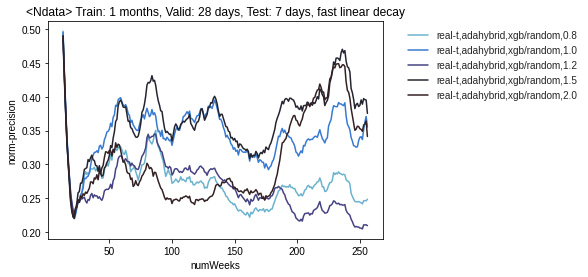

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))
plt.style.use('seaborn-dark')
colors = sns.color_palette("icefire", 8)
ax.set_prop_cycle('color', colors)

result_one_dataset = sorted([key for key in full_results.keys() if 'real-t' in key])
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
    print(key, len(full_results[key]), round(np.mean(avg_result[-200:]), 4), round(np.mean(avg_result[-100:]), 4), 
    round(np.mean(avg_result[-50:]), 4),round(np.mean(avg_result[-13:]), 4))
    ax.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Ndata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.ylabel(var)
plt.xlabel('numWeeks')
# plt.ylim(0.4, 0.6)
plt.show()
plt.close()

### 2. Tuning randomness [ada-eps] 

In [6]:
results = glob.glob('../results/performances/ada-eps-2*')   # quick- or www21- or fld-
list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))

In [7]:
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

full_results = defaultdict(list)

# Retrieving results
num_logs = len([i for i in list1 if i > 1000])
count= 0
for i in range(1,num_logs+1):
    try:
        df = pd.read_csv(list2[-i])
        rolling_mean7 = df[var].rolling(window=7).mean()
        rolling_mean14 = df[var].rolling(window=14).mean()
        filename = list2[-i][list2[-i].index('16'):list2[-i].index('16')+10]
        info = ','.join([str(x) for x in df[['data', 'sampling', 'subsamplings', 'ada_lr', 'ada_epsilon']].iloc[0]])
        full_results[info].append(rolling_mean14)
        count += 1
        
# Draw individual figures
#         plt.figure()
#         plt.title(info+','+filename)
#         plt.plot(df['numWeek'], df[var], color='skyblue', label='Weekly')
#         plt.plot(df['numWeek'], rolling_mean7, color='teal', label='MA (7 weeks)')
#         plt.plot(df['numWeek'], rolling_mean14, color='blue', label='MA (14 weeks)')
#         plt.legend(loc='upper left')
#         plt.ylabel(var)
#         plt.xlabel('numWeeks')
#         plt.show()
    except:
        print('loading error:', list2[-i])
        continue
print(count)
#     plt.close()

22


In [8]:
full_results.keys()

dict_keys(['real-t,adahybrid,xgb/random,1.5,0.05', 'real-t,adahybrid,xgb/random,1.5,0.1', 'real-t,adahybrid,xgb/random,1.5,0.3', 'real-t,adahybrid,xgb/random,1.5,0.4', 'real-t,adahybrid,xgb/random,1.5,0.2', 'real-t,adahybrid,xgb/random,1.5,0.5', 'real-t,adahybrid,xgb/random,1.5,0.0'])

The number of trials for each setting (Results are averaged):
real-t,adahybrid,xgb/random,1.5,0.0 4 0.3508 0.3444 0.3671 0.3382
real-t,adahybrid,xgb/random,1.5,0.05 3 0.2778 0.2722 0.3033 0.294
real-t,adahybrid,xgb/random,1.5,0.1 3 0.2982 0.2913 0.3116 0.2841
real-t,adahybrid,xgb/random,1.5,0.2 3 0.3135 0.3141 0.3385 0.2963
real-t,adahybrid,xgb/random,1.5,0.3 3 0.3065 0.2993 0.3184 0.2812
real-t,adahybrid,xgb/random,1.5,0.4 3 0.3156 0.2962 0.3218 0.2912
real-t,adahybrid,xgb/random,1.5,0.5 3 0.3164 0.3037 0.3208 0.3091


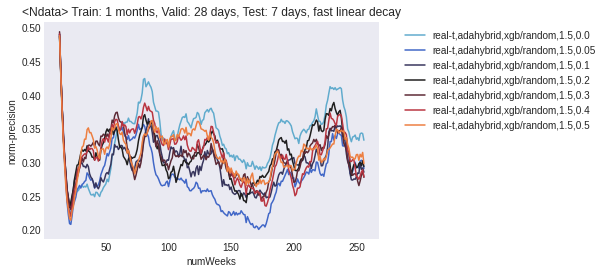

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))
plt.style.use('seaborn-dark')
colors = sns.color_palette("icefire", 7)
ax.set_prop_cycle('color', colors)

result_one_dataset = sorted([key for key in full_results.keys() if 'real-t' in key])
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
    print(key, len(full_results[key]), round(np.mean(avg_result[-200:]), 4), round(np.mean(avg_result[-100:]), 4),      round(np.mean(avg_result[-50:]), 4),round(np.mean(avg_result[-13:]), 4))
    ax.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Ndata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.ylabel(var)
plt.xlabel('numWeeks')
# plt.ylim(0.4, 0.6)
plt.show()
plt.close()

### 3. Tuning decay rate [ada-decay] 

In [10]:
results = glob.glob('../results/performances/ada-decay-*')   # quick- or www21- or fld-
list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))

In [11]:
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

full_results = defaultdict(list)

# Retrieving results
num_logs = len([i for i in list1 if i > 1000])
count= 0
for i in range(1,num_logs+1):
    try:
        df = pd.read_csv(list2[-i])
        rolling_mean7 = df[var].rolling(window=7).mean()
        rolling_mean14 = df[var].rolling(window=14).mean()
        filename = list2[-i][list2[-i].index('16'):list2[-i].index('16')+10]
        info = ','.join([str(x) for x in df[['data', 'sampling', 'subsamplings', 'ada_lr', 'ada_decay']].iloc[0]])
        full_results[info].append(rolling_mean14)
        count += 1
        
# Draw individual figures
#         plt.figure()
#         plt.title(info+','+filename)
#         plt.plot(df['numWeek'], df[var], color='skyblue', label='Weekly')
#         plt.plot(df['numWeek'], rolling_mean7, color='teal', label='MA (7 weeks)')
#         plt.plot(df['numWeek'], rolling_mean14, color='blue', label='MA (14 weeks)')
#         plt.legend(loc='upper left')
#         plt.ylabel(var)
#         plt.xlabel('numWeeks')
#         plt.show()
    except:
        print('loading error:', list2[-i])
        continue
print(count)
#     plt.close()

42


In [12]:
full_results.keys()

dict_keys(['real-t,adahybrid,xgb/random,1.5,1.0', 'real-t,adahybrid,xgb/random,1.5,0.7', 'real-t,adahybrid,xgb/random,1.2,0.7', 'real-t,adahybrid,xgb/random,1.5,0.8', 'real-t,adahybrid,xgb/random,1.2,0.9', 'real-t,adahybrid,xgb/random,1.2,0.95', 'real-t,adahybrid,xgb/random,1.5,0.6', 'real-t,adahybrid,xgb/random,1.5,0.9', 'real-t,adahybrid,xgb/random,1.2,0.6', 'real-t,adahybrid,xgb/random,1.5,0.95', 'real-t,adahybrid,xgb/random,1.5,0.5', 'real-t,adahybrid,xgb/random,1.2,0.8', 'real-t,adahybrid,xgb/random,1.2,0.5', 'real-t,adahybrid,xgb/random,1.2,1.0'])

The number of trials for each setting (Results are averaged):
real-t,adahybrid,xgb/random,1.5,0.5 3 0.3125 0.3029 0.3367 0.3136
real-t,adahybrid,xgb/random,1.5,0.6 3 0.3081 0.3088 0.3352 0.3153
real-t,adahybrid,xgb/random,1.5,0.7 3 0.3027 0.3102 0.3314 0.3122
real-t,adahybrid,xgb/random,1.5,0.8 3 0.3111 0.3085 0.3165 0.2943
real-t,adahybrid,xgb/random,1.5,0.9 3 0.2919 0.2916 0.3052 0.2797
real-t,adahybrid,xgb/random,1.5,0.95 3 0.3273 0.3173 0.3336 0.3273
real-t,adahybrid,xgb/random,1.5,1.0 3 0.3142 0.3087 0.3257 0.2876


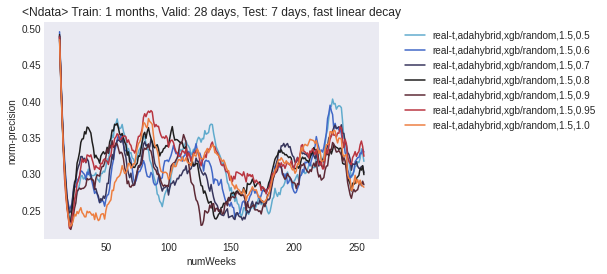

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))
plt.style.use('seaborn-dark')
colors = sns.color_palette("icefire", 7)
ax.set_prop_cycle('color', colors)

result_one_dataset = sorted([key for key in full_results.keys() if 'real-t' in key and '1.5' in key])
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
    print(key, len(full_results[key]), round(np.mean(avg_result[-200:]), 4), round(np.mean(avg_result[-100:]), 4),      round(np.mean(avg_result[-50:]), 4),round(np.mean(avg_result[-13:]), 4))
    ax.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Ndata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.ylabel(var)
plt.xlabel('numWeeks')
# plt.ylim(0.4, 0.6)
plt.show()
plt.close()

## Exp 2. Our strategies [main]
    - AdaHybrid
    - Drift
    - Regulated Adahybrid

### 1. Adahybrid [main-ada] 

In [14]:
results = glob.glob('../results/performances/main-all-*') +  glob.glob('../results/performances/main-ada-2*')   # quick- or www21- or fld-
list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))

In [15]:
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

full_results = defaultdict(list)

# Retrieving results
num_logs = len([i for i in list1 if i > 1000])
count= 0
for i in range(1,num_logs+1):
    try:
        df = pd.read_csv(list2[-i])
        rolling_mean7 = df[var].rolling(window=7).mean()
        rolling_mean14 = df[var].rolling(window=14).mean()
        filename = list2[-i][list2[-i].index('16'):list2[-i].index('16')+10]
        info = ','.join([str(x) for x in df[['data', 'sampling', 'subsamplings', 'ada_lr', 'ada_epsilon', 'current_weights']].iloc[0]])
        full_results[info].append(rolling_mean14)
        count += 1
        
# Draw individual figures
#         plt.figure()
#         plt.title(info+','+filename)
#         plt.plot(df['numWeek'], df[var], color='skyblue', label='Weekly')
#         plt.plot(df['numWeek'], rolling_mean7, color='teal', label='MA (7 weeks)')
#         plt.plot(df['numWeek'], rolling_mean14, color='blue', label='MA (14 weeks)')
#         plt.legend(loc='upper left')
#         plt.ylabel(var)
#         plt.xlabel('numWeeks')
#         plt.show()
    except:
        print('loading error:', list2[-i])
        continue
print(count)
#     plt.close()

72


In [16]:
full_results.keys()

dict_keys(['real-t,adahybrid,xgb/random,1.5,0,0.9/0.1', 'real-t,hybrid,xgb/random,-,-,0.4/0.6', 'real-t,hybrid,xgb/random,-,-,0.7/0.3', 'real-t,hybrid,xgb/random,-,-,0.9/0.1', 'real-t,hybrid,xgb/random,-,-,0.0/1.0', 'real-t,hybrid,xgb/random,-,-,0.3/0.7', 'real-t,hybrid,xgb/random,-,-,0.6/0.4', 'real-t,hybrid,xgb/random,-,-,0.5/0.5', 'real-t,hybrid,xgb/random,-,-,0.8/0.2', 'real-t,hybrid,xgb/random,-,-,0.1/0.9', 'real-t,hybrid,xgb/random,-,-,0.2/0.8', 'real-t,hybrid,xgb/random,-,-,1.0/0.0'])

The number of trials for each setting (Results are averaged):
real-t,adahybrid,xgb/random,1.5,0,0.9/0.1 6 0.3454 0.346 0.3737 0.3522
real-t,hybrid,xgb/random,-,-,0.0/1.0 6 0.1033 0.1044 0.1066 0.1038
real-t,hybrid,xgb/random,-,-,0.1/0.9 6 0.1836 0.1797 0.1824 0.1782
real-t,hybrid,xgb/random,-,-,0.2/0.8 6 0.2469 0.24 0.2468 0.2337
real-t,hybrid,xgb/random,-,-,0.3/0.7 6 0.2923 0.282 0.2937 0.2735
real-t,hybrid,xgb/random,-,-,0.4/0.6 6 0.3254 0.3124 0.3288 0.3005
real-t,hybrid,xgb/random,-,-,0.5/0.5 6 0.3458 0.3305 0.3524 0.3203
real-t,hybrid,xgb/random,-,-,0.6/0.4 6 0.3552 0.3425 0.3677 0.3368
real-t,hybrid,xgb/random,-,-,0.7/0.3 6 0.3601 0.352 0.3816 0.351
real-t,hybrid,xgb/random,-,-,0.8/0.2 6 0.3637 0.3632 0.3964 0.3755
real-t,hybrid,xgb/random,-,-,0.9/0.1 6 0.3387 0.3465 0.3767 0.3527
real-t,hybrid,xgb/random,-,-,1.0/0.0 6 0.1726 0.1466 0.1417 0.1216


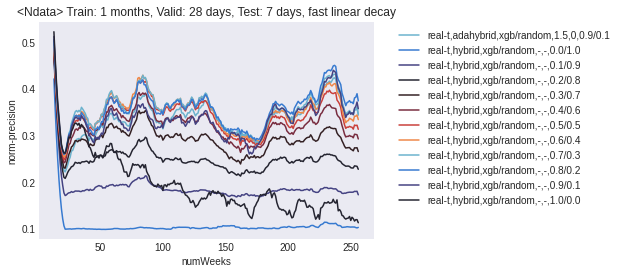

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))
plt.style.use('seaborn-dark')
colors = sns.color_palette("icefire", 8)
ax.set_prop_cycle('color', colors)

result_one_dataset = sorted([key for key in full_results.keys() if 'real-t' in key])
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
    print(key, len(full_results[key]), round(np.mean(avg_result[-200:]), 4), round(np.mean(avg_result[-100:]), 4),      
    round(np.mean(avg_result[-50:]), 4),round(np.mean(avg_result[-13:]), 4))
    ax.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Ndata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.ylabel(var)
plt.xlabel('numWeeks')
# plt.ylim(0.4, 0.6)
plt.show()
plt.close()

The number of trials for each setting (Results are averaged):
real-t,adahybrid,xgb/random,1.5,0,0.9/0.1 6 0.3454 0.346 0.3737 0.3522
real-t,hybrid,xgb/random,-,-,0.8/0.2 6 0.3637 0.3632 0.3964 0.3755


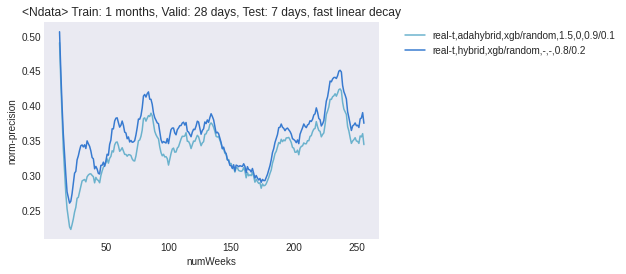

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))
plt.style.use('seaborn-dark')
colors = sns.color_palette("icefire", 8)
ax.set_prop_cycle('color', colors)

result_one_dataset = sorted([key for key in full_results.keys() if '1.5' in key or '0.8/0.2' in key])
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
    print(key, len(full_results[key]), round(np.mean(avg_result[-200:]), 4), round(np.mean(avg_result[-100:]), 4),      
    round(np.mean(avg_result[-50:]), 4),round(np.mean(avg_result[-13:]), 4))
    ax.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Ndata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.ylabel(var)
plt.xlabel('numWeeks')
# plt.ylim(0.4, 0.6)
plt.show()
plt.close()

### 2. Concept drift [ada-cd] 

In [19]:
results = glob.glob('../results/performances/main-all-*') + glob.glob('../results/performances/main-cd-*')   # quick- or www21- or fld-
list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))

In [20]:
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

full_results = defaultdict(list)

# Retrieving results
num_logs = len([i for i in list1 if i > 1000])
count= 0
for i in range(1,num_logs+1):
    try:
        df = pd.read_csv(list2[-i])
        rolling_mean7 = df[var].rolling(window=7).mean()
        rolling_mean14 = df[var].rolling(window=14).mean()
        filename = list2[-i][list2[-i].index('16'):list2[-i].index('16')+10]
        info = ','.join([str(x) for x in df[['data', 'sampling', 'subsamplings', 'current_weights']].iloc[0]])
        full_results[info].append(rolling_mean14)
        count += 1
        
# Draw individual figures
#         plt.figure()
#         plt.title(info+','+filename)
#         plt.plot(df['numWeek'], df[var], color='skyblue', label='Weekly')
#         plt.plot(df['numWeek'], rolling_mean7, color='teal', label='MA (7 weeks)')
#         plt.plot(df['numWeek'], rolling_mean14, color='blue', label='MA (14 weeks)')
#         plt.legend(loc='upper left')
#         plt.ylabel(var)
#         plt.xlabel('numWeeks')
#         plt.show()
    except:
        print('loading error:', list2[-i])
        continue
print(count)
#     plt.close()

75


In [21]:
full_results.keys()

dict_keys(['real-t,pot,xgb/random,0.9/0.1', 'real-t,hybrid,xgb/random,0.4/0.6', 'real-t,hybrid,xgb/random,0.7/0.3', 'real-t,hybrid,xgb/random,0.9/0.1', 'real-t,hybrid,xgb/random,0.0/1.0', 'real-t,hybrid,xgb/random,0.3/0.7', 'real-t,hybrid,xgb/random,0.6/0.4', 'real-t,hybrid,xgb/random,0.5/0.5', 'real-t,hybrid,xgb/random,0.8/0.2', 'real-t,hybrid,xgb/random,0.1/0.9', 'real-t,hybrid,xgb/random,0.2/0.8', 'real-t,hybrid,xgb/random,1.0/0.0', 'real-t,csi,xgb/random,0.9/0.1'])

The number of trials for each setting (Results are averaged):
real-t,csi,xgb/random,0.9/0.1 3 0.3252 0.3275 0.3578 0.3396
real-t,hybrid,xgb/random,0.0/1.0 6 0.1033 0.1044 0.1066 0.1038
real-t,hybrid,xgb/random,0.1/0.9 6 0.1836 0.1797 0.1824 0.1782
real-t,hybrid,xgb/random,0.2/0.8 6 0.2469 0.24 0.2468 0.2337
real-t,hybrid,xgb/random,0.3/0.7 6 0.2923 0.282 0.2937 0.2735
real-t,hybrid,xgb/random,0.4/0.6 6 0.3254 0.3124 0.3288 0.3005
real-t,hybrid,xgb/random,0.5/0.5 6 0.3458 0.3305 0.3524 0.3203
real-t,hybrid,xgb/random,0.6/0.4 6 0.3552 0.3425 0.3677 0.3368
real-t,hybrid,xgb/random,0.7/0.3 6 0.3601 0.352 0.3816 0.351
real-t,hybrid,xgb/random,0.8/0.2 6 0.3637 0.3632 0.3964 0.3755
real-t,hybrid,xgb/random,0.9/0.1 6 0.3387 0.3465 0.3767 0.3527
real-t,hybrid,xgb/random,1.0/0.0 6 0.1726 0.1466 0.1417 0.1216
real-t,pot,xgb/random,0.9/0.1 6 0.3578 0.3497 0.3755 0.3495


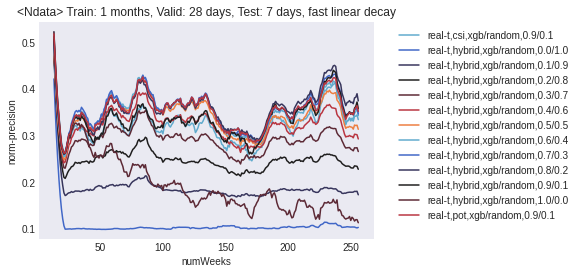

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))
plt.style.use('seaborn-dark')
colors = sns.color_palette("icefire", 7)
ax.set_prop_cycle('color', colors)

result_one_dataset = sorted([key for key in full_results.keys() if 'real-t' in key])
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
    print(key, len(full_results[key]), round(np.mean(avg_result[-200:]), 4), round(np.mean(avg_result[-100:]), 4),      
    round(np.mean(avg_result[-50:]), 4),round(np.mean(avg_result[-13:]), 4))
    ax.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Ndata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.ylabel(var)
plt.xlabel('numWeeks')
# plt.ylim(0.4, 0.6)
plt.show()
plt.close()

The number of trials for each setting (Results are averaged):
real-t,csi,xgb/random,0.9/0.1 3 0.3252 0.3275 0.3578 0.3396
real-t,hybrid,xgb/random,0.8/0.2 6 0.3637 0.3632 0.3964 0.3755
real-t,pot,xgb/random,0.9/0.1 6 0.3578 0.3497 0.3755 0.3495


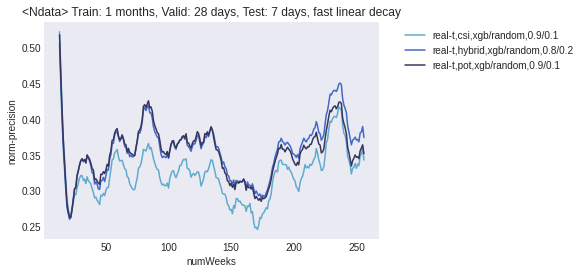

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))
plt.style.use('seaborn-dark')
colors = sns.color_palette("icefire", 7)
ax.set_prop_cycle('color', colors)

result_one_dataset = sorted([key for key in full_results.keys() if 'hybrid' not in key or '0.8/0.2' in key])
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
    print(key, len(full_results[key]), round(np.mean(avg_result[-200:]), 4), round(np.mean(avg_result[-100:]), 4),      
    round(np.mean(avg_result[-50:]), 4),round(np.mean(avg_result[-13:]), 4))
    ax.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Ndata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.ylabel(var)
plt.xlabel('numWeeks')
# plt.ylim(0.4, 0.6)
plt.show()
plt.close()

### 3. Regulated Ada [main-rada] 

In [34]:
results =  glob.glob('../results/performances/main-all*') + glob.glob('../results/performances/main-rada-3-result*')   # quick- or www21- or fld-
list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))

In [35]:
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

full_results = defaultdict(list)

# Retrieving results
num_logs = len([i for i in list1 if i > 1000])
count= 0
for i in range(1,num_logs+1):
    try:
        df = pd.read_csv(list2[-i])
        var = 'norm-precision'
        rolling_mean7 = df[var].rolling(window=7).mean()
        rolling_mean14 = df[var].rolling(window=14).mean()
        filename = list2[-i][list2[-i].index('16'):list2[-i].index('16')+10]
        info = ','.join([str(x) for x in df[['data', 'sampling', 'subsamplings', 'mixing', 'current_weights']].iloc[0]])
        full_results[info].append(rolling_mean14)
        count += 1
        
# Draw individual figures
#         plt.figure()
#         plt.title(info+','+filename)
#         plt.plot(df['numWeek'], df[var], color='skyblue', label='Weekly')
#         plt.plot(df['numWeek'], rolling_mean7, color='teal', label='MA (7 weeks)')
#         plt.plot(df['numWeek'], rolling_mean14, color='blue', label='MA (14 weeks)')
#         plt.legend(loc='upper left')
#         plt.ylabel(var)
#         plt.xlabel('numWeeks')
#         plt.show()
    except:
        print('loading error:', list2[-i])
        continue
print(count)
#     plt.close()

69


In [36]:
full_results.keys()

dict_keys(['real-t,hybrid,xgb/random,-,0.4/0.6', 'real-t,hybrid,xgb/random,-,0.7/0.3', 'real-t,hybrid,xgb/random,-,0.9/0.1', 'real-t,hybrid,xgb/random,-,0.0/1.0', 'real-t,hybrid,xgb/random,-,0.3/0.7', 'real-t,hybrid,xgb/random,-,0.6/0.4', 'real-t,hybrid,xgb/random,-,0.5/0.5', 'real-t,hybrid,xgb/random,-,0.8/0.2', 'real-t,hybrid,xgb/random,-,0.1/0.9', 'real-t,hybrid,xgb/random,-,0.2/0.8', 'real-t,hybrid,xgb/random,-,1.0/0.0', 'real-t,rada,xgb/random,multiply,0.9/0.1'])

The number of trials for each setting (Results are averaged):
real-t,hybrid,xgb/random,-,0.0/1.0 6 0.1033 0.1044 0.1066 0.1038
real-t,hybrid,xgb/random,-,0.1/0.9 6 0.1836 0.1797 0.1824 0.1782
real-t,hybrid,xgb/random,-,0.2/0.8 6 0.2469 0.24 0.2468 0.2337
real-t,hybrid,xgb/random,-,0.3/0.7 6 0.2923 0.282 0.2937 0.2735
real-t,hybrid,xgb/random,-,0.4/0.6 6 0.3254 0.3124 0.3288 0.3005
real-t,hybrid,xgb/random,-,0.5/0.5 6 0.3458 0.3305 0.3524 0.3203
real-t,hybrid,xgb/random,-,0.6/0.4 6 0.3552 0.3425 0.3677 0.3368
real-t,hybrid,xgb/random,-,0.7/0.3 6 0.3601 0.352 0.3816 0.351
real-t,hybrid,xgb/random,-,0.8/0.2 6 0.3637 0.3632 0.3964 0.3755
real-t,hybrid,xgb/random,-,0.9/0.1 6 0.3387 0.3465 0.3767 0.3527
real-t,hybrid,xgb/random,-,1.0/0.0 6 0.1726 0.1466 0.1417 0.1216
real-t,rada,xgb/random,multiply,0.9/0.1 3 0.2231 0.1869 0.1443 0.1034


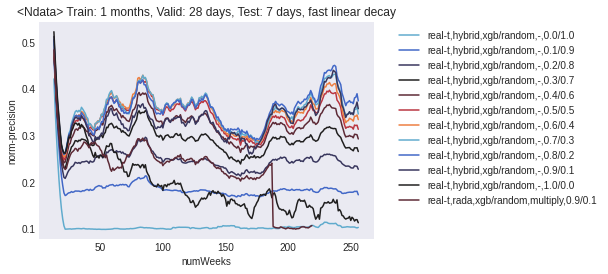

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))
plt.style.use('seaborn-dark')
colors = sns.color_palette("icefire", 7)
ax.set_prop_cycle('color', colors)

result_one_dataset = sorted([key for key in full_results.keys() if 'real-t' in key])
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
    print(key, len(full_results[key]), round(np.mean(avg_result[-200:]), 4), round(np.mean(avg_result[-100:]), 4),      round(np.mean(avg_result[-50:]), 4),round(np.mean(avg_result[-13:]), 4))
    ax.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Ndata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.ylabel(var)
plt.xlabel('numWeeks')
# plt.ylim(0.4, 0.6)
plt.show()
plt.close()

The number of trials for each setting (Results are averaged):
real-t,hybrid,xgb/random,-,0.8/0.2 6 0.3637 0.3632 0.3964 0.3755
real-t,rada,xgb/random,multiply,0.9/0.1 3 0.2231 0.1869 0.1443 0.1034


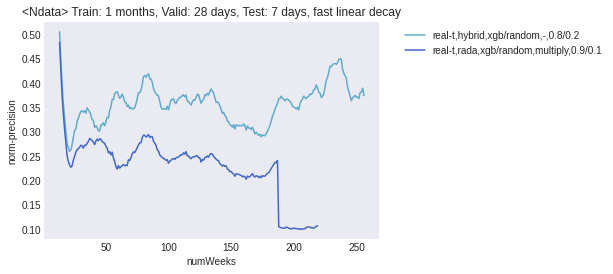

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))
plt.style.use('seaborn-dark')
colors = sns.color_palette("icefire", 7)
ax.set_prop_cycle('color', colors)

result_one_dataset = sorted([key for key in full_results.keys() if 'hybrid' not in key or '0.8/0.2' in key])
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
    print(key, len(full_results[key]), round(np.mean(avg_result[-200:]), 4), round(np.mean(avg_result[-100:]), 4),      
    round(np.mean(avg_result[-50:]), 4),round(np.mean(avg_result[-13:]), 4))
    ax.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Ndata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.ylabel(var)
plt.xlabel('numWeeks')
# plt.ylim(0.4, 0.6)
plt.show()
plt.close()